**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [25]:
%autosave 10

Autosaving every 10 seconds


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [28]:
# Import the dataset
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [29]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats = df_train[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
pay_amt_feats = df_train[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [30]:
bill_feats.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdad77b1358>,
      dtype=object)

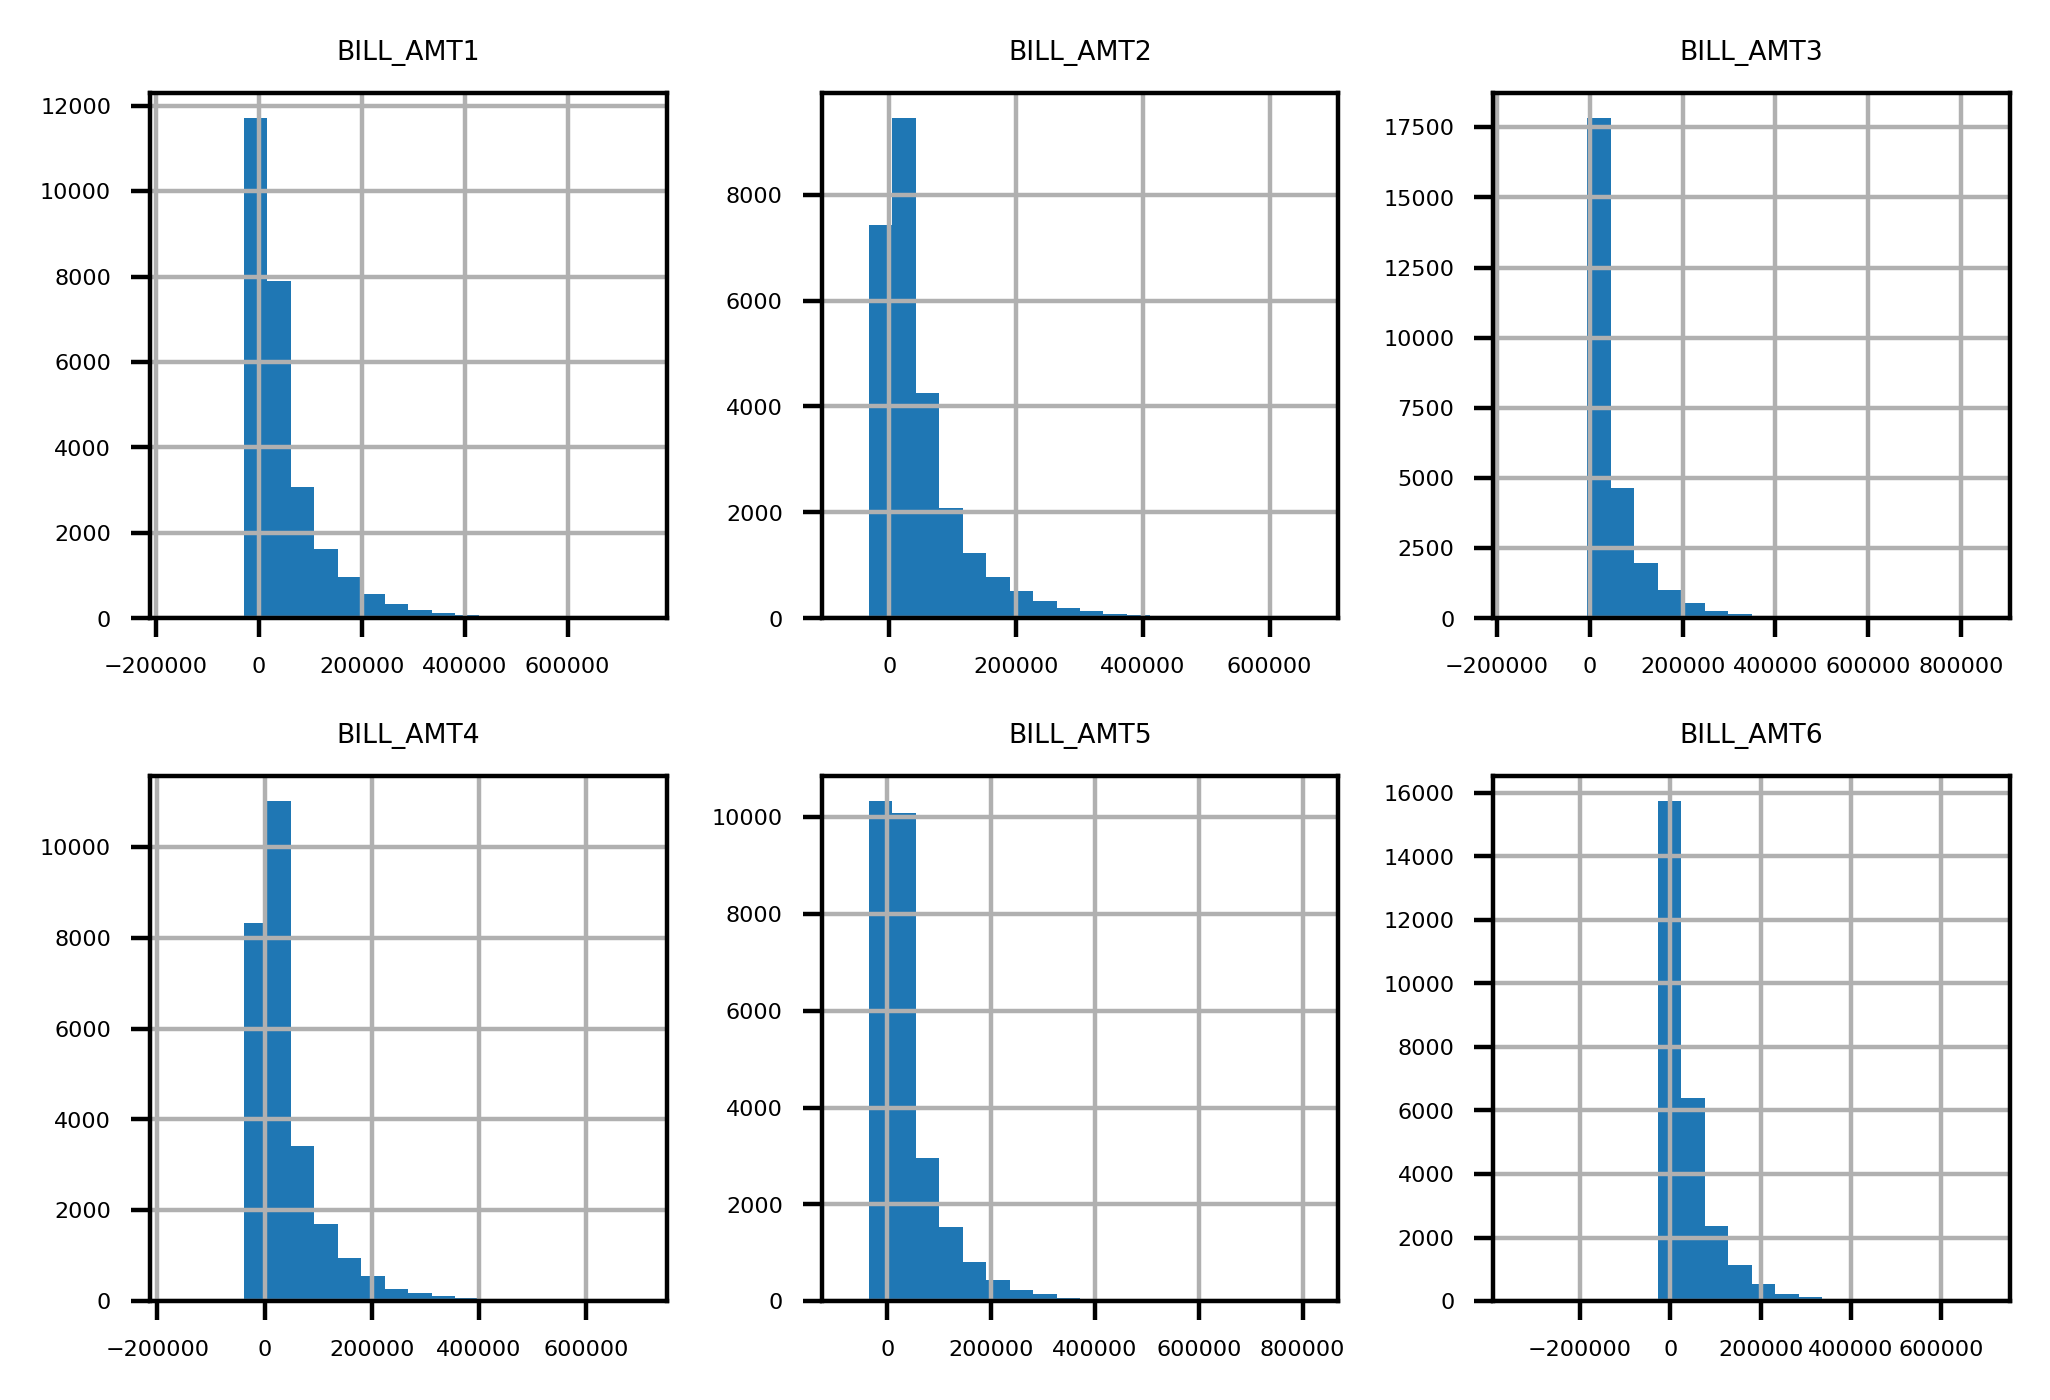

In [31]:
bill_feats.hist(bins=20,layout=(2,3))

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [32]:
pay_amt_feats.describe()  

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdad743c358>,
      dtype=object)

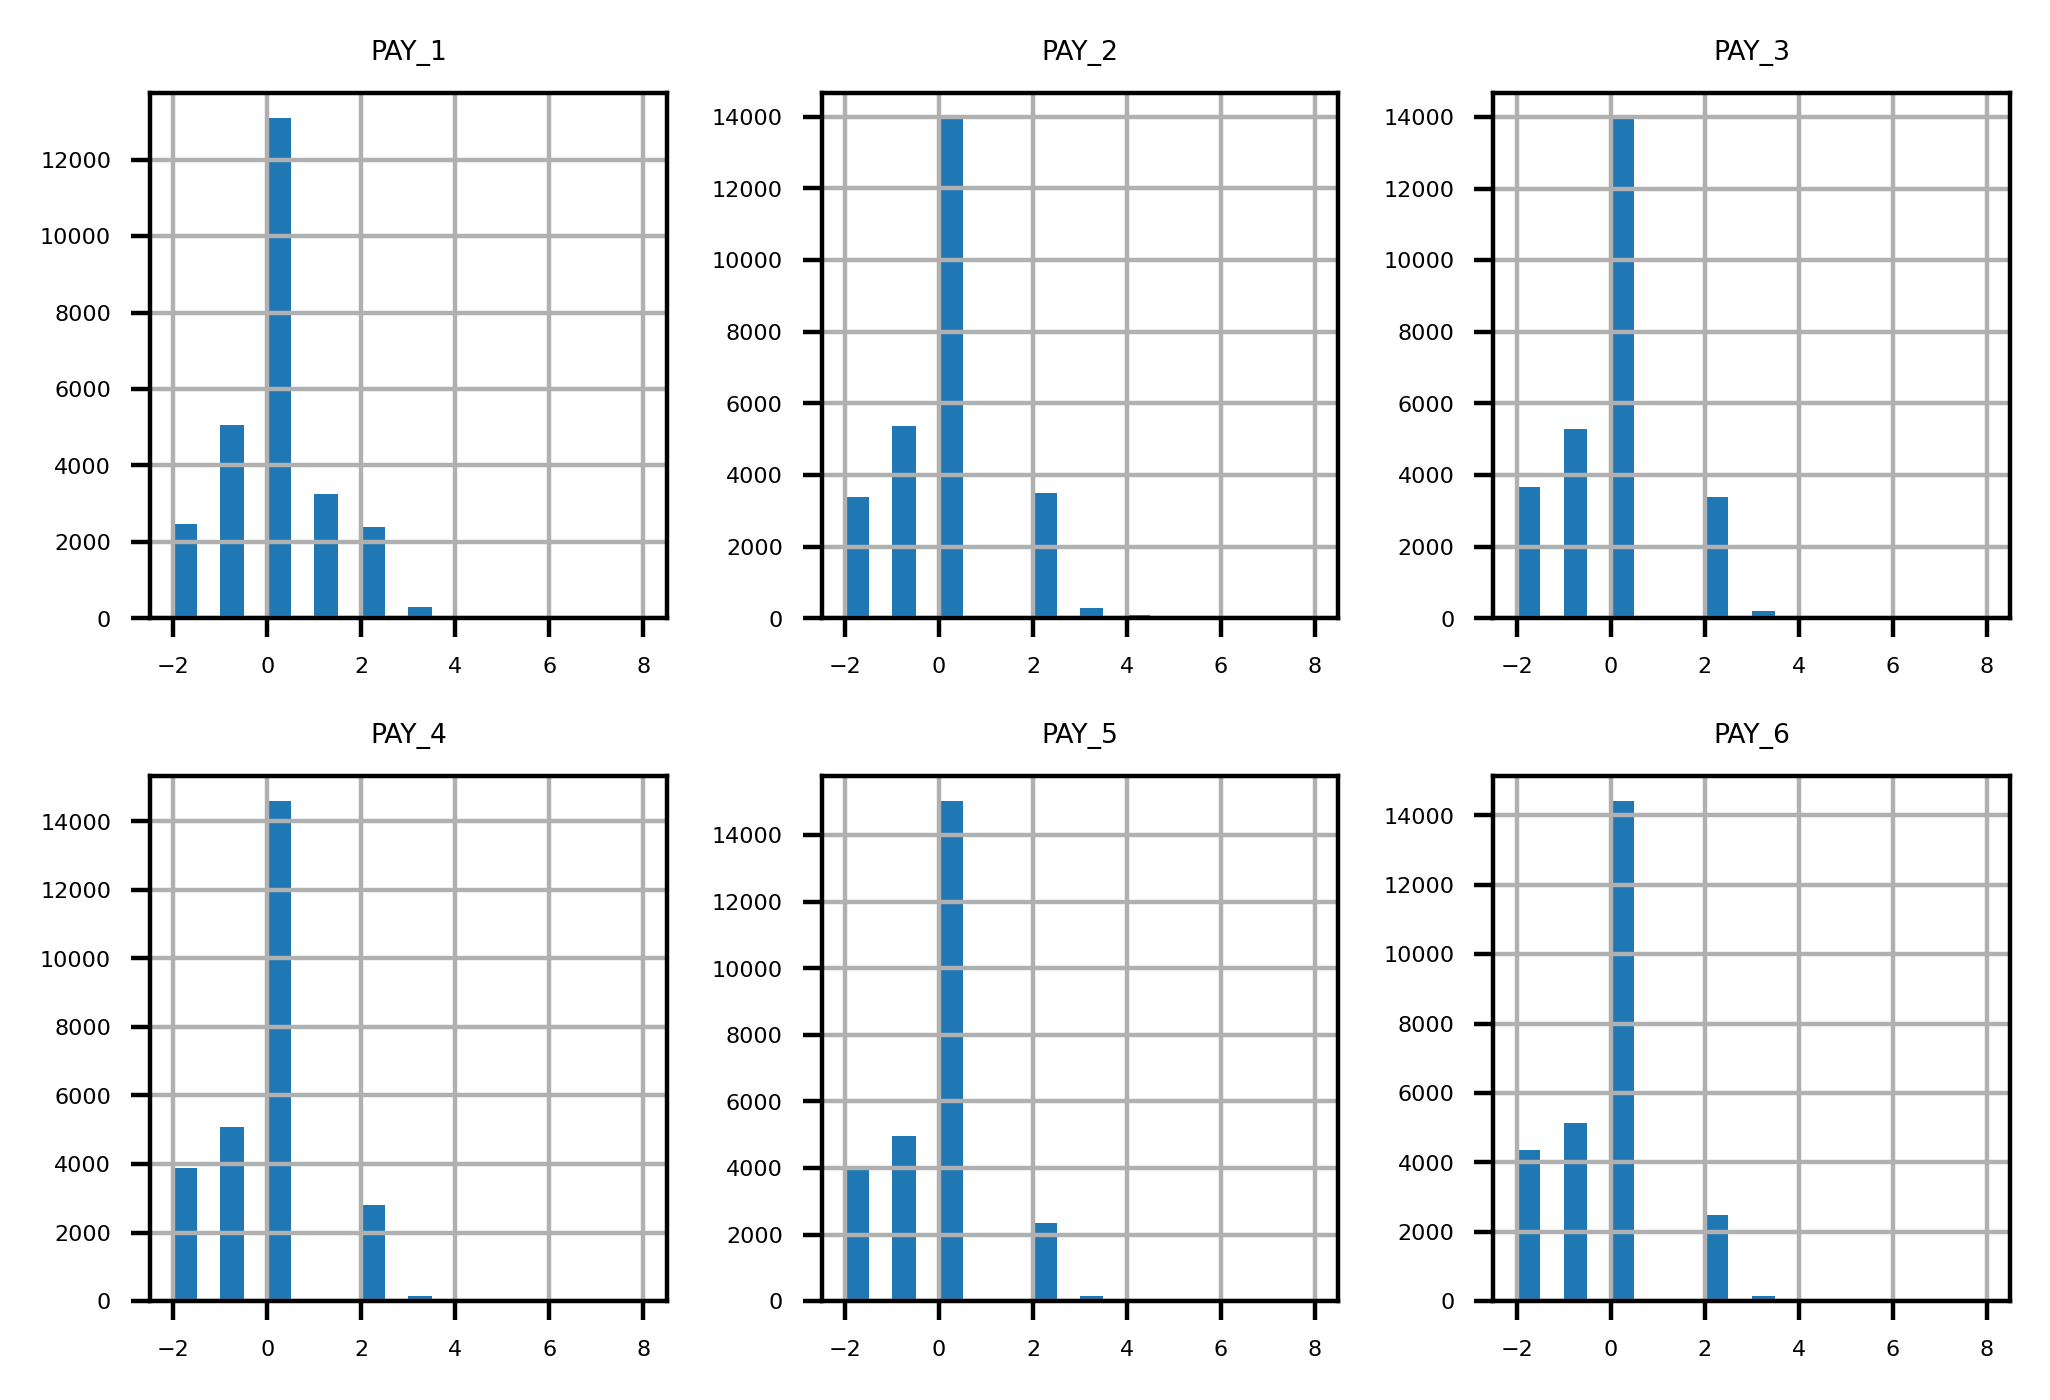

In [33]:
pay_amt_feats.hist(bins=20,layout=(2,3))

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [50]:
# Create Boolean mask
a = pay_amt_feats == 0

In [51]:
# Use `.head()`
a.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,False,False,False,False,False,False
1,False,False,True,True,True,False
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,True,False,True,True,True


In [52]:
# Use `.sum()`
a.sum()

PAY_1    13087
PAY_2    13961
PAY_3    13968
PAY_4    14596
PAY_5    15032
PAY_6    14416
dtype: int64

In [53]:
pay_amt_feats.PAY_1.value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [54]:
# Create Boolean mask
b = bill_feats == 0

In [55]:
# Use `.head()`
b.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,False,False,False,True,True,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [56]:
# Use `.sum()`
b.sum()

BILL_AMT1    1795
BILL_AMT2    2225
BILL_AMT3    2568
BILL_AMT4    2861
BILL_AMT5    3121
BILL_AMT6    3586
dtype: int64

In [57]:
bill_feats.BILL_AMT1.value_counts()

0         1795
390        217
780         66
326         62
316         55
          ... 
160388       1
104028       1
4744         1
6793         1
49120        1
Name: BILL_AMT1, Length: 20519, dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdad70eb6a0>,
      dtype=object)

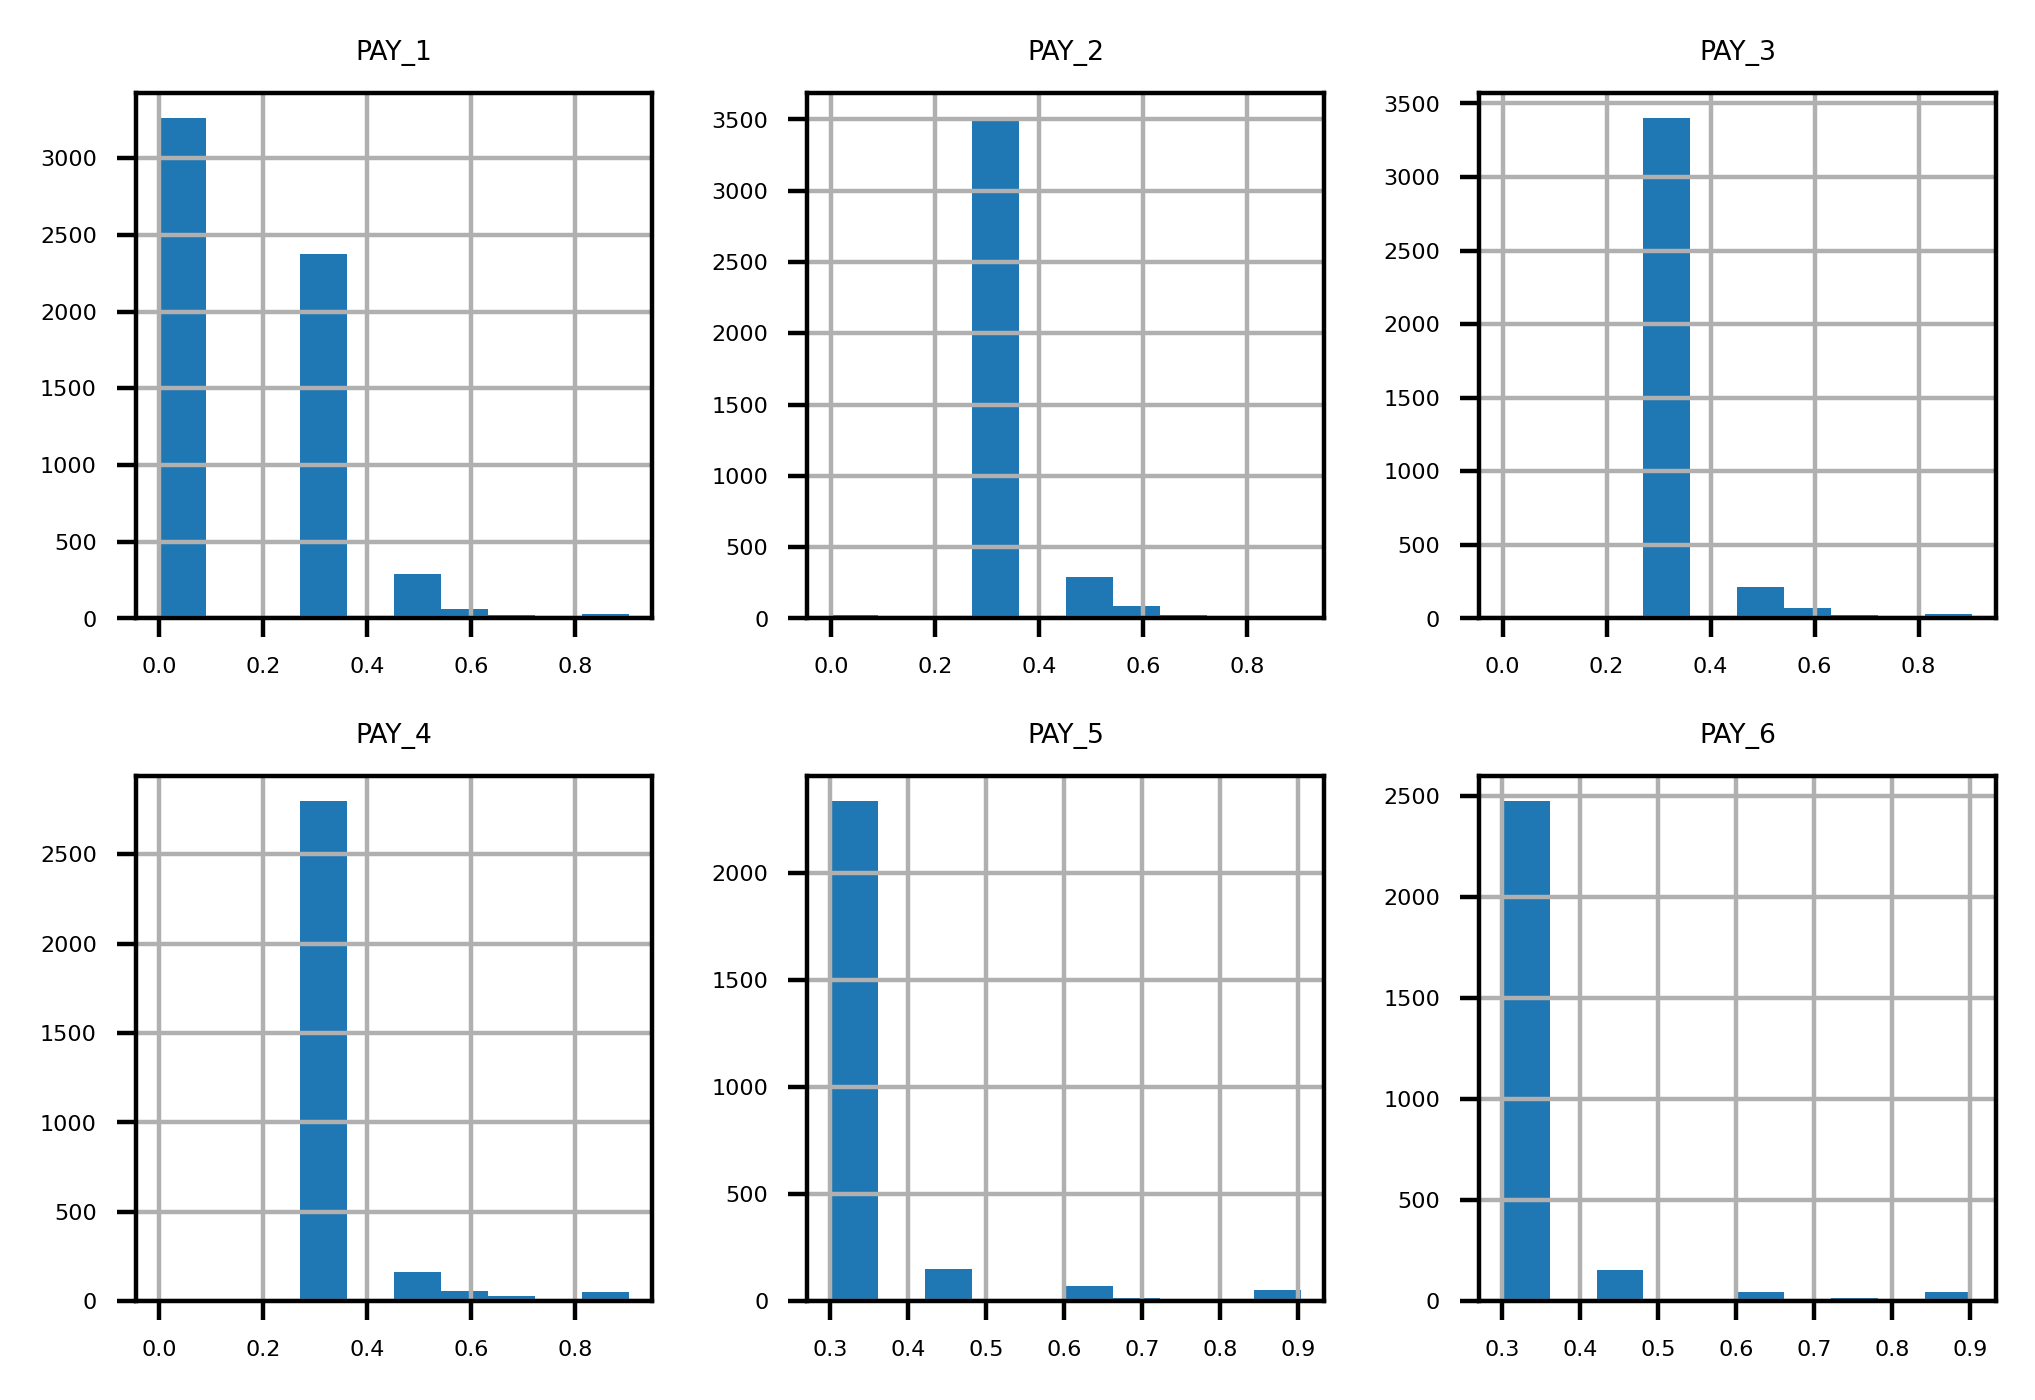

In [60]:
import numpy as np
pay_amt_feats[~a].apply(np.log10).hist(layout=(2,3))